<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%206/Clustering%20Week%206/Colab%20Notebook/ClusteringWeek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

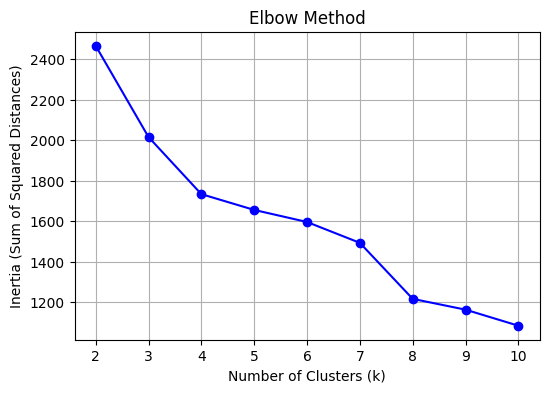

KMeans Evaluation:
{'Silhouette': np.float64(0.3733000279015801), 'Calinski-Harabasz': np.float64(3054.9753980401692), 'Davies-Bouldin': np.float64(1.41778602283613), 'Dunn Index': np.float64(0.022755710737849565)}

Agglomerative Clustering Evaluation:
{'Silhouette': np.float64(0.36881419324223785), 'Calinski-Harabasz': np.float64(2837.6136633429214), 'Davies-Bouldin': np.float64(1.2862792169382495), 'Dunn Index': np.float64(0.03865874582390081)}


In [3]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix

# 2. Load data
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv')
X = df.values

# 3. Elbow Method untuk KMeans
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# 4. Evaluasi dengan berbagai metrik
def dunn_index(X, labels):
    clusters = np.unique(labels)
    distances = distance_matrix(X, X)
    intra_dists = [np.max(distances[labels == c][:, labels == c]) for c in clusters]
    inter_dists = [np.min(distances[labels == i][:, labels == j])
                   for i in clusters for j in clusters if i != j]
    return np.min(inter_dists) / np.max(intra_dists)

def evaluate_clustering(X, labels):
    return {
        "Silhouette": silhouette_score(X, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X, labels),
        "Davies-Bouldin": davies_bouldin_score(X, labels),
        "Dunn Index": dunn_index(X, labels)
    }

# 5. KMeans dan Agglomerative Clustering dengan n_clusters = 3 (misalnya)
kmeans_model = KMeans(n_clusters=3, random_state=42).fit(X)
agglo_model = AgglomerativeClustering(n_clusters=3).fit(X)

kmeans_labels = kmeans_model.labels_
agglo_labels = agglo_model.labels_

print("KMeans Evaluation:")
print(evaluate_clustering(X, kmeans_labels))

print("\nAgglomerative Clustering Evaluation:")
print(evaluate_clustering(X, agglo_labels))

# 6. Penjelasan matematika di file pdf
